## Numpy和原生Python用于数组计算的性能对比
需求：
* 实现两个树的加法
* 数组A是1-N数字的平方
* 数组B是1-N数字的立方

对比使用Numpy和原生Python的性能对比

In [1]:
import numpy as np

In [2]:
np.__version__

'1.18.1'

## 使用Python原生语法实现对比

In [3]:
def python_sum(n):
    """
    Python实现的数组的加法
    @param n: 数组的长度
    """
    a = [i ** 2 for i in range(n)]
    b = [i ** 3 for i in range(n)]
    c = []
    for i in range(n):
        c.append(a[i] + b[i])
    return c

In [4]:
# 测试一下
python_sum(10)

[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

## 使用numpy实现

In [6]:
def numpy_sum(n):
    a = np.arange(n) ** 2
    b = np.arange(n) ** 3
    return a + b

In [10]:
# 测试一下
numpy_sum(10)

array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

## 性能对比: 执行1000次

In [11]:
%timeit python_sum(1000)

912 µs ± 42.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
%timeit numpy_sum(1000)

11.1 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 性能对比: 执行10万次

In [13]:
%timeit python_sum(10000 * 10)

95.7 ms ± 3.59 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%timeit numpy_sum(10000 * 10)

554 µs ± 57.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 性能对比: 执行1000万次

In [15]:
%timeit python_sum(10000 * 1000)

9.55 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit numpy_sum(10000 * 1000)

132 ms ± 6.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 绘制性能对比图

In [17]:
pytimes = [912, 95.7 * 1000, 9.55 * 1000 * 1000]
nptimes = [11.1, 554, 132 * 1000]

In [18]:
import pandas as pd
df = pd.DataFrame({
    "pytimes": pytimes,
    "nptimes": nptimes,
})

<AxesSubplot:>

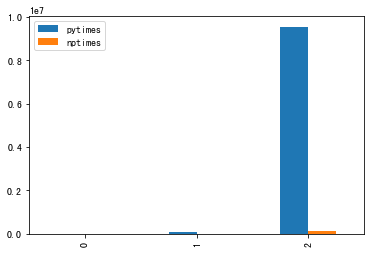

In [20]:
df.plot.bar()